# CNN Brain Tumor Detection
The objective of this notebook is to build, train, and test a convolutional neural network to identify brain tumors on brain MRI images. We will use the *cv2* lib to load and treat the images. *TensorFlow* and *Keras* to build the CNN and the other popular libs of data science on *Python*.

## Importing the libraries

In [1]:
import cv2           
import numpy as np
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

## Loading the images dataset

We have 253 brain MRI images. We get this images from a Kagle dataset, you can find it [here](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection).<p>
**NOTE:** I do not own any of this images

In [2]:
path = "MRI_images"
train_dir = os.path.join(path)
os.listdir(train_dir)

['N (1).jpeg',
 'N (2).jpeg',
 'N (2).jpg',
 'N (3).jpg',
 'N (4).jpg',
 'N (5).jpg',
 'N (6).jpg',
 'N (7).jpg',
 'N (8).jpg',
 'N (9).jpg',
 'N (10).jpg',
 'N (11).jpg',
 'N (12).jpg',
 'N (13).jpg',
 'N (14).jpg',
 'N (15).jpg',
 'N (16).jpg',
 'N (17).jpg',
 'N (18).jpg',
 'N (19).jpg',
 'N (20).jpg',
 'N (21).jpg',
 'N (22).jpg',
 'N (23).jpg',
 'N (24).jpg',
 'N (25).jpg',
 'N (26).jpg',
 'N (27).jpg',
 'N (28).jpg',
 'N (29).jpg',
 'N (30).jpg',
 'N (31).jpg',
 'N (32).jpg',
 'N (33).jpg',
 'N (34).jpg',
 'N (35).jpg',
 'N (36).jpg',
 'N (37).jpg',
 'N (38).jpg',
 'N (39).jpg',
 'N (40).jpg',
 'N (41).jpg',
 'N (42).jpg',
 'N (43).jpg',
 'N (44).jpg',
 'N (45).jpg',
 'N (3).jpeg',
 'N (46).jpg',
 'N (47).jpg',
 'N (48).JPG',
 'N (49).JPG',
 'N (50).jpg',
 'N (51).jpg',
 'N (52).jpg',
 'N (53).jpg',
 'N (54).jpg',
 'N (55).jpg',
 'N (56).jpg',
 'N (57).JPG',
 'N (58).JPG',
 'N (59).jpg',
 'N (60).JPG',
 'N (61).JPG',
 'N (62).jpg',
 'N (63).jpg',
 'N (64).jpg',
 'N (65).jpg',
 'N

Now, we patronize the images. We will use the names of the files to categorize the images.<br>
The "Y" images are images of a brain MRI with a tumor, and the "N" images are images without a tumor.<p>

We read every image on the path, transform it into an array, and resize the images to *128x128px*

In [3]:
width, height = 128, 128 

classes = []
images = []
for i in os.listdir(train_dir):
    if i.startswith("Y"):
        classes.append(1)
    else:
        classes.append(0)
    
        
    image = cv2.imread(os.path.join(path,i))
    image = cv2.resize(image, (width, height))
    images.append(image)

In [4]:
images_array = np.array(images)
classes_array = np.array(classes)

In [5]:
class_names = ["No Tumor","Tumor"]

## Visualizing the images

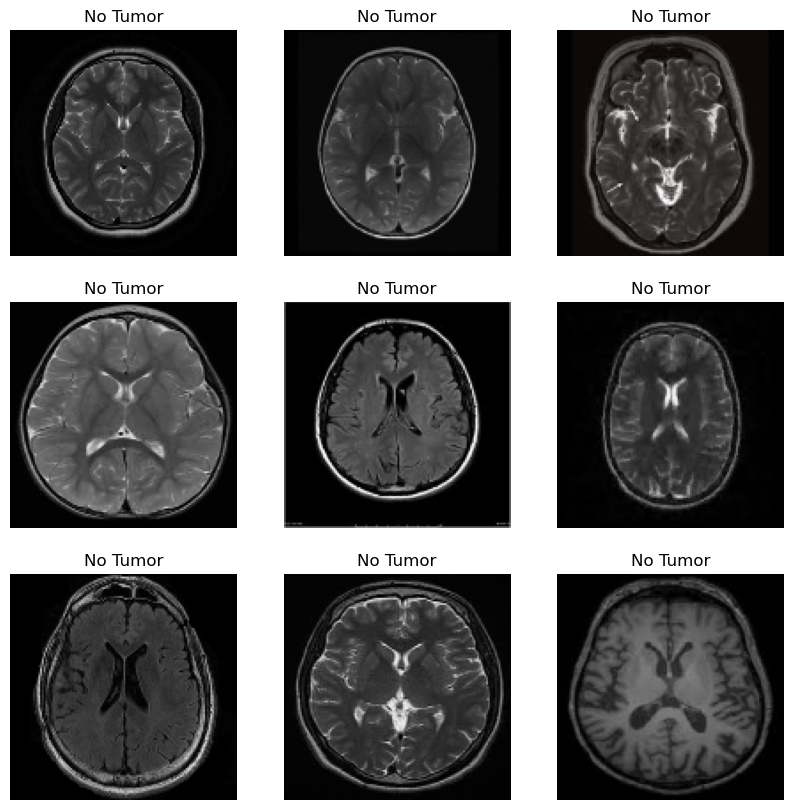

In [6]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images_array[i])
    plt.title(class_names[classes[i]])
    plt.axis(False)

This is a sample of the images with the label "Tumor" or "No Tumor"

## Image Treatment

First, we divide the array by 255 so all the images are transformed in arrays with entries between 0 and 1.

In [7]:
images_array = images_array/255

We do the train and validation split.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(images_array,classes_array,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(202, 128, 128, 3)

In [10]:
X_val.shape

(51, 128, 128, 3)

As we can see our train set has 202 images and the validation set has 51 images.

## Data Augmentation

We will use the keras.Sequential to add a data agumentation layer on the CNN.<p>
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

In [11]:
data_augmentation = keras.Sequential([keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                     keras.layers.experimental.preprocessing.RandomZoom(0.1),
                                     keras.layers.experimental.preprocessing.RandomFlip("horizontal")])

An example of an image after the data augmentation layer. One image became 9 just by rotating and zooming it.

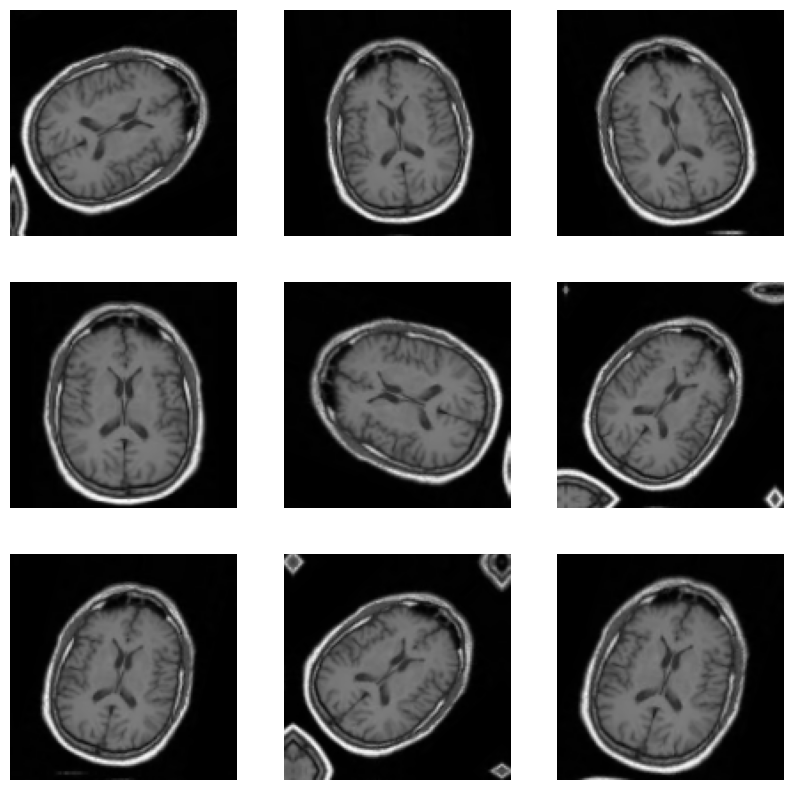

In [12]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    data_augmented = data_augmentation(X_train[0])
    plt.imshow(data_augmented)
    plt.axis(False)

## Convolutional Neural Network Building

Building the CNN unsing the *keras.Sequential* 

In [13]:
model = keras.Sequential([data_augmentation, # the data augmentation layer
                          keras.layers.Conv2D(256,input_shape=(128, 128, 3),activation="relu",kernel_size=3,strides=2,padding="same"), # the first convolutional layer (the input layer)
                          keras.layers.MaxPooling2D(2), # max pooling layer 
                          keras.layers.Conv2D(128,activation="relu",kernel_size=3,strides=2,padding="same"), # the second convolutional layer
                          keras.layers.MaxPooling2D(), # another max pooling layer 
                          keras.layers.Conv2D(64,activation="relu",kernel_size=3,strides=2,padding="same"), # the third convolutional layer
                          keras.layers.MaxPooling2D(), # yes, another max pooling layer                      
                          
                          keras.layers.Flatten(), # this layer is used to flatten the 2d output of the other columns into a 1d array
                          keras.layers.Dense(1000,activation="relu"), # a dense layer responsible for learining patterns in the flattened input area
                          keras.layers.Dense(1,activation="sigmoid") # add a output layer with sigmoid activation (sice we have a binary classification)
    
    
])

Since we have the CNN ready, we will compile an early stop argument.

In [14]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=keras.optimizers.Adam(learning_rate=0.01))

# if the model does not improve accuracy in 20 epochs we stop it
early_stop = keras.callbacks.EarlyStopping(patience=20)

Training the model

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=200,callbacks=early_stop)

Epoch 1/200
7/7 [==============================] - 3s 263ms/step - loss: 4.8775 - accuracy: 0.5248 - val_loss: 0.6757 - val_accuracy: 0.6078
Epoch 2/200
7/7 [==============================] - 2s 242ms/step - loss: 0.6847 - accuracy: 0.6040 - val_loss: 0.6724 - val_accuracy: 0.6078
Epoch 3/200
7/7 [==============================] - 2s 232ms/step - loss: 0.6617 - accuracy: 0.6139 - val_loss: 0.7052 - val_accuracy: 0.5686
Epoch 4/200
7/7 [==============================] - 2s 240ms/step - loss: 0.6405 - accuracy: 0.6584 - val_loss: 1.0711 - val_accuracy: 0.3922
Epoch 5/200
7/7 [==============================] - 2s 224ms/step - loss: 0.7495 - accuracy: 0.5644 - val_loss: 0.6449 - val_accuracy: 0.6078
Epoch 6/200
7/7 [==============================] - 2s 228ms/step - loss: 0.6275 - accuracy: 0.6188 - val_loss: 0.6549 - val_accuracy: 0.6078
Epoch 7/200
7/7 [==============================] - 2s 226ms/step - loss: 0.6268 - accuracy: 0.6535 - val_loss: 0.8108 - val_accuracy: 0.6078
Epoch 8/200
7

Now we can see the result of the model. We can see how the accuracy is improving along the epochs. It is not linear, but is clear that the model is learning from its errors. This is how a CNN works. Reinforcment learning: is a machine learning training method based on rewarding desired behaviors and punishing undesired ones.  

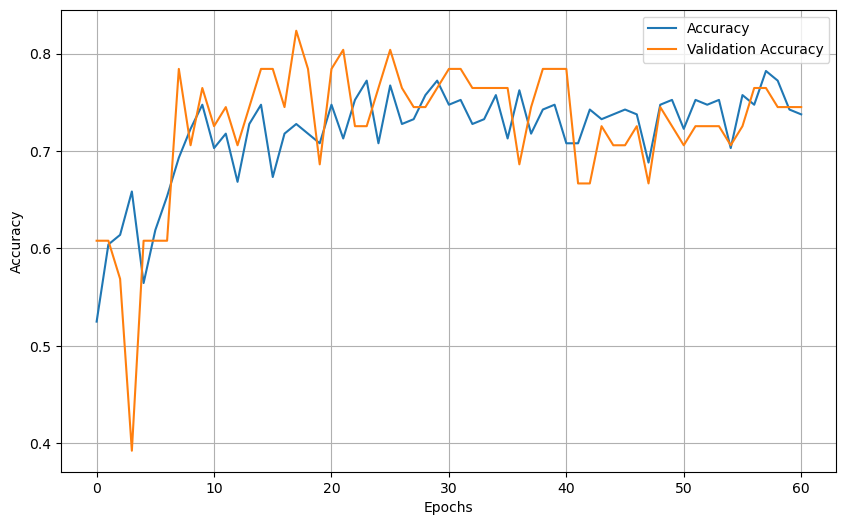

In [16]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(10,6))
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Evaluating the CNN

Okay, our model is trained, now we need to evaluate if it is accurate. 

But first, when we look at the output of the model the is a number between 0 and 1 that represents the probability of an image to have (or not) a brain tumor. Since our target set is binary (we have only two possibilities "Tumor": 1 or "No Tumor": 0) we need to set a threshold, i.e., a cut point to the probability. It is common to set the threshold to 0.5, but I am not sure if this is the best threshold to improve our accuracy.

Another point: we need to take a deeper look into the false negatives. If one has a brain tumor, we don't want to tell one has not. Fortunately, we have a metric that is sensible to false negatives: the recall.   

Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances.

The sklearn has a recall score, so we don't need to calculate it.

With that in mind we want to set the best threshold to get the best recall score without cause much demage to the accuracy score.

2/2 [==============================] - 0s 43ms/step


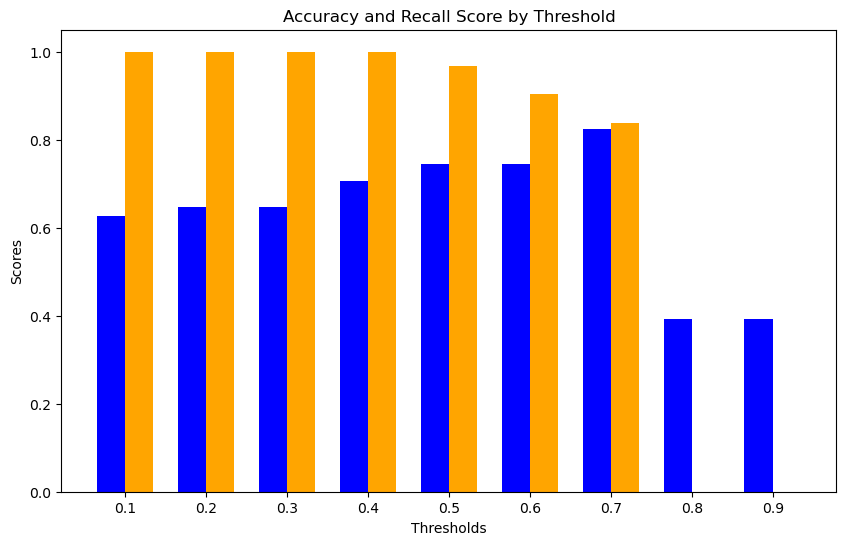

Best threshold: 0.7
Accuracy: 82.35 %
Recall: 83.87 %


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

prediction = model.predict(X_val)
tresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,  0.9]
acc_score = []
rcl_score = []
diff = 1
best_treshold = 0
best_acc = 0
best_rcl = 0


for treshold in tresholds:
    prediction_label = []
    for i in list(prediction):
        if i >= treshold:
            prediction_label.append(1)
        else:
            prediction_label.append(0)
    acc = accuracy_score(y_val, prediction_label)
    rcl = recall_score(y_val, prediction_label)
    acc_score.append(acc)
    rcl_score.append(rcl)
    if abs(acc-rcl)<diff:
        diff=abs(acc-rcl)
        best_acc = acc
        best_rcl = rcl
        best_treshold=treshold

    

bar = 0.35
pos = np.arange(len(tresholds))
acc_pos = pos - bar/2
rcl_pos = pos + bar/2

plt.figure(figsize=(10,6))
axis = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]

plt.bar(acc_pos,acc_score,bar,label='Accuracy Score',color='blue')

plt.bar(rcl_pos,rcl_score,bar,label='Recall Score',color='orange')
plt.xlabel("Thresholds")
plt.ylabel("Scores")
plt.title('Accuracy and Recall Score by Threshold')
plt.xticks(pos,axis)

plt.show()

print("Best threshold:", best_treshold)
print(f"Accuracy:",round(best_acc*100,2),"%")
print(f"Recall:",round(best_rcl*100,2),"%")

In [18]:
prediction_label = []
for i in list(prediction):
    if i >= best_treshold:
        prediction_label.append(1)
    else:
        prediction_label.append(0)

## Confusion Matrix

A confusion matrix is a matrix used to evaluate the performance of a classification model. The dimension of the matrix is *n*⨯*n*, where *n* is the number of the target classes. The matrix compares the actual target values with the target values predicted by the model.

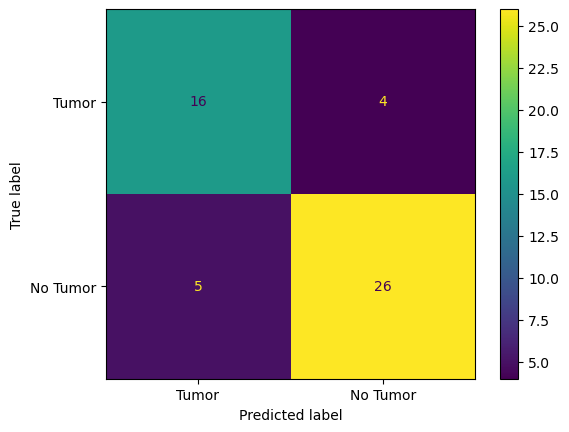

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_pred=prediction_label, y_true=y_val)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Tumor',"No Tumor"])

cm_display.plot()
plt.show()

As we can see, our model predicted correctly for 16 "Tumor" images and 26 "No Tumor" images. The attention point is when the model predicts "No Tumor" and it is wrong, it happened 4 times. There are also 5 cases where the model predicted a "Tumor", and there is no tumor. 

# Conclusion

Now, let's get some sample MRI images from the validation set, and plot them with the actual label and the predicted one to see where the model gets right and wrong.  

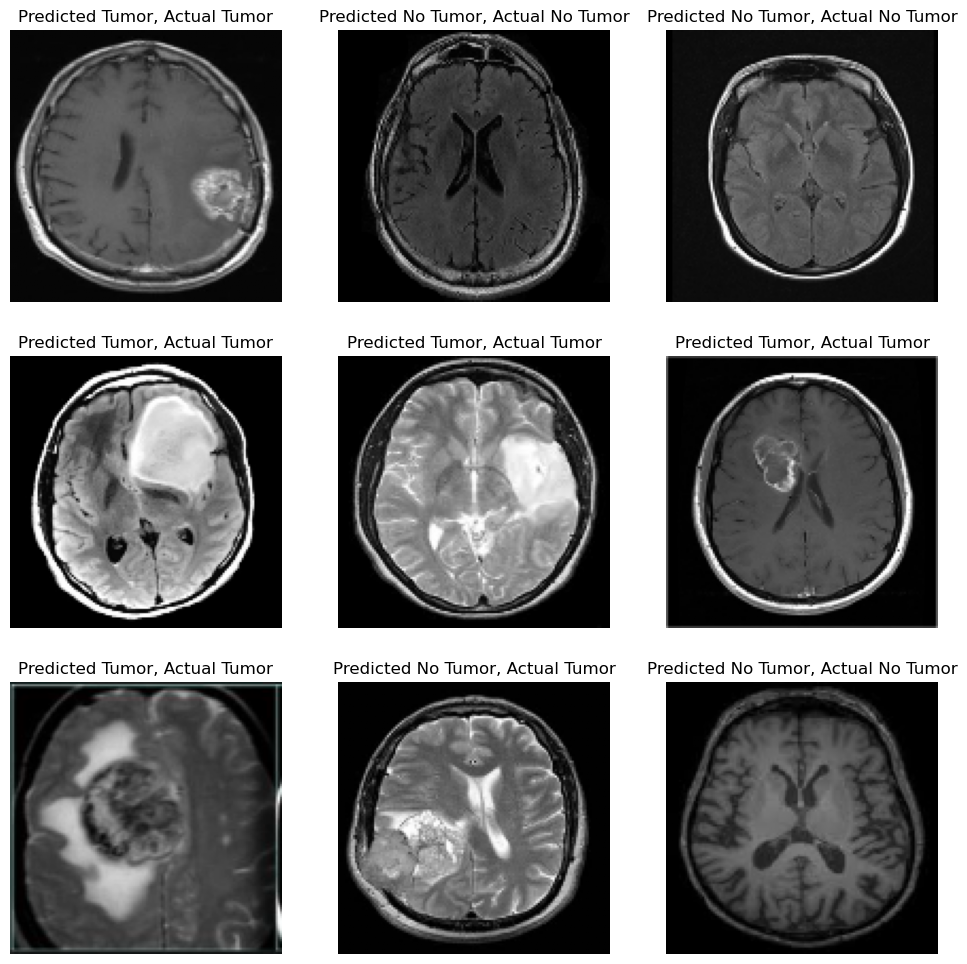

In [20]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[i])
    plt.title(f"Predicted {class_names[prediction_label[i]]}, Actual {class_names[y_val[i]]}")
    plt.axis(False)

Now, the model is ready to deploy. But this is a problem that I will tackle at another time. 

With the deploy in mind, I will already do the dump of the model using the pickle library.

In [23]:
import pickle
with open("cnn_brain_tumor_identifier.pkl", "wb") as f:
    pickle.dump(model, f)

Follow me and stay tuned for updates!

# Thank You!